In [1]:
import sys
print(sys.version_info)
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
print ("Scikit-Learn version: ", sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)
Scikit-Learn version:  1.3.0


In [2]:
import matplotlib.pyplot as plt

def plot_digit(image_data, axis=False):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")

    if not axis:
        plt.axis("off")
    # else: 
    #     plt.axis("on")

In [3]:
def plot_multi(img,start=0,end=100):
    plt.figure(figsize=(9, 9))
    for idx, image_data in enumerate(img[start:end]):
        plt.subplot(10, 10, idx + 1)
        plot_digit(image_data)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

## data preparation

In [4]:
from pathlib import Path

path = Path() / "dataset_cleaned"
print(path)

dataset_cleaned


In [5]:
# get the latest datasets - rebased
curr_data_num_trVal = np.load(path / "digit_data_TrVal_corrected.npz")
curr_data_sym_trVal = np.load(path / "op_data_TrVal_corrected.npz")

In [6]:
curr_data_num_trVal_img = curr_data_num_trVal["img"]
curr_data_sym_trVal_img = curr_data_sym_trVal["img"]

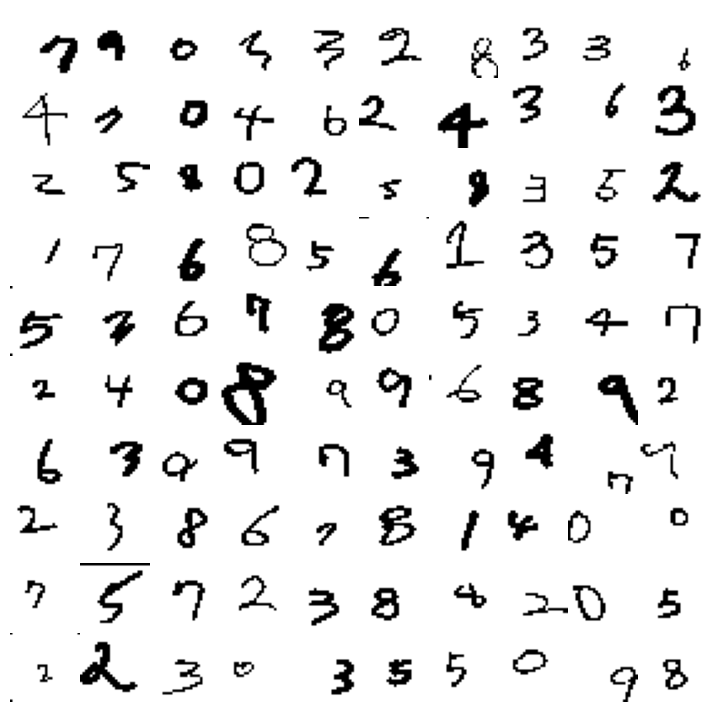

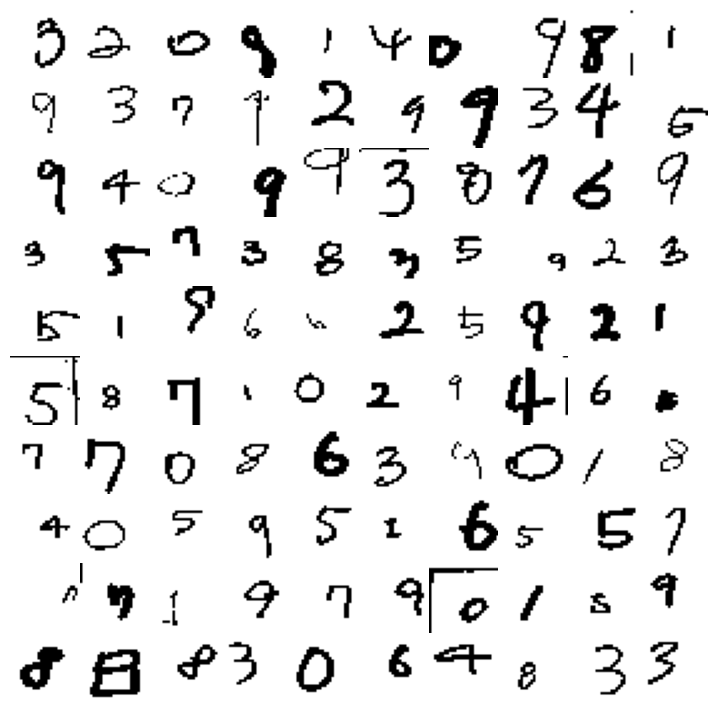

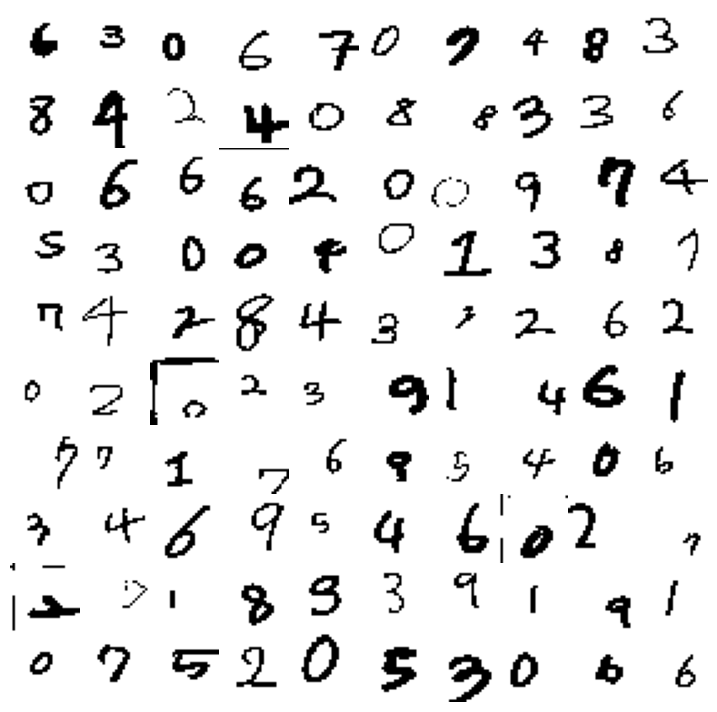

In [7]:
for i in range(3):
    plot_multi(curr_data_num_trVal_img,i * 100,i * 100 + 100)

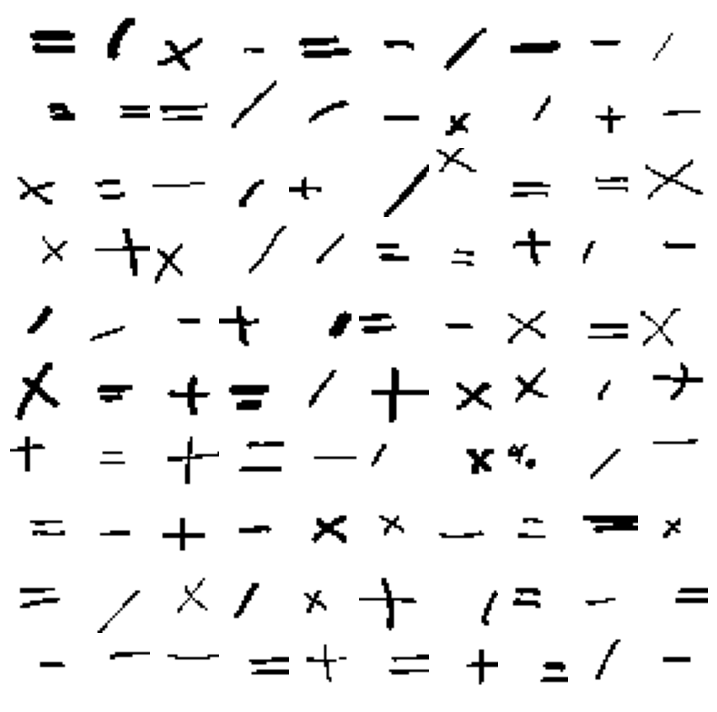

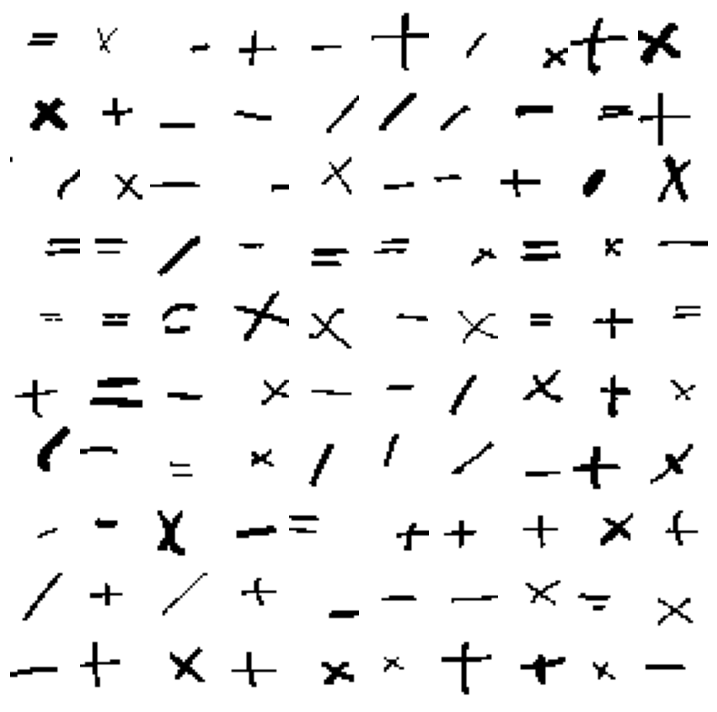

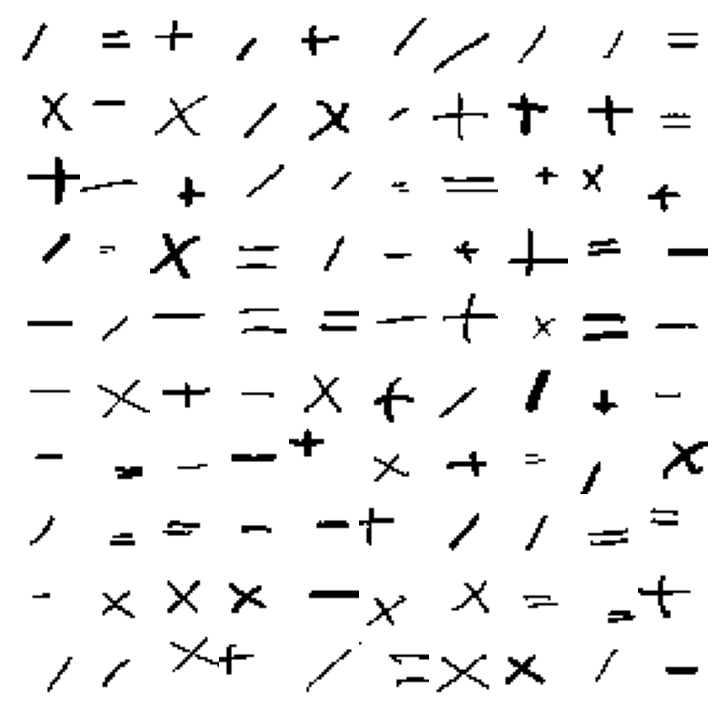

In [8]:
for i in np.arange(0,300,100):
    plot_multi(curr_data_sym_trVal_img,i,i+100)

so here's the problem; some data's border is included
the easy way is deleting a certain amount of edges, but this may cause some datasets to lose its data(that is close to the edges)

the smart way will be **detecting** the border
how? we can see most borders have something in common; a (kinda) straight line at the edges

so here's the plan;

1. look at each edge (top, down, left, right) and detect whether it contains a certain number of pixels (14~20?)
2. If detected, check the thickness of the boundary
3. delete that certain part

and also

4. rebase

as the boundary is gone

## test with sample

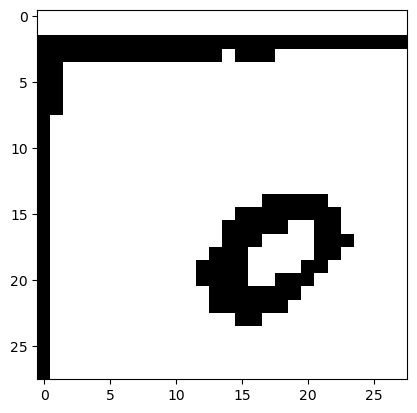

In [9]:
sample = curr_data_num_trVal_img[186].copy()
plot_digit(sample,True)
plt.show()

In [10]:
np.count_nonzero(np.reshape(sample,(28,28))[0:4,:])

45

In [11]:
def detect_del_boundary(img, thickness = 4, threshold = 10):
    curr = np.reshape(img,(28,28))
    
    # how much you want to look at
    t = thickness
    # the threshold
    threshold_t = threshold
    
    cnt_top = np.count_nonzero(curr[0:t,:])
    cnt_down = np.count_nonzero(curr[28-t:28,:])
    cnt_left = np.count_nonzero(curr[:,0:t])
    cnt_right = np.count_nonzero(curr[:,28-t:28])
    
    if cnt_top > threshold_t:
        curr[0:t,:] = 0.
    
    if cnt_down > threshold_t:
        curr[28-t:28,:] = 0.
    
    if cnt_left > threshold_t:
        curr[:,0:t] = 0.
        
    if cnt_right > threshold_t:
        curr[:,28-t:28] = 0.
    
    return np.reshape(curr, 784)

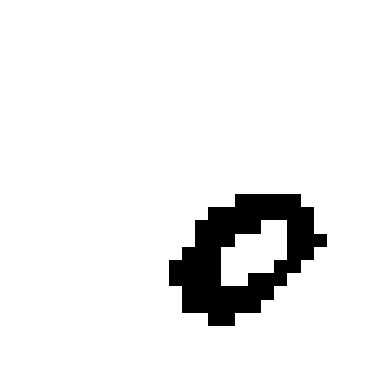

In [12]:
test = detect_del_boundary(sample)
plot_digit(test)
plt.show()

not bad, let's try something else

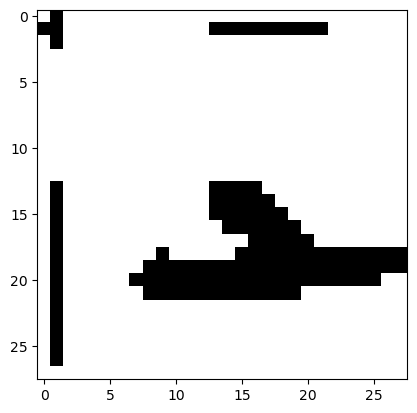

In [13]:
sample = curr_data_num_trVal_img[280].copy()
plot_digit(sample,True)
plt.show()

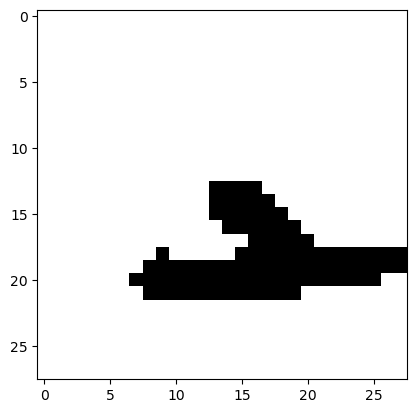

In [14]:
test = detect_del_boundary(sample)
plot_digit(test,True)
plt.show()

we can see it did not damage the data(although some parts were at the boundary)
so finding the appropriate thickness and threshold may be crucial

In [29]:
def detect_del_boundary_v2(img, thickness = 4, threshold = 10):
    curr = np.reshape(img,(28,28))
    
    # how much you want to look at
    t = thickness
    # the threshold
    threshold_t = threshold
    
    for i in range(t):
        cnt_top = np.count_nonzero(curr[i:i+1,:])
        cnt_down = np.count_nonzero(curr[28-i:28-i+1,:])
        cnt_left = np.count_nonzero(curr[:,i:i+1])
        cnt_right = np.count_nonzero(curr[:,27-i:27-i+1])
        
        if cnt_top > threshold_t:
            curr[i:i+1,:] = 0.
        
        if cnt_down > threshold_t:
            curr[28-i:28-i+1,:] = 0.
        
        if cnt_left > threshold_t:
            curr[:,i:i+1] = 0.
            
        if cnt_right > threshold_t:
            curr[:,27-i:27-i+1] = 0.
    
    return curr

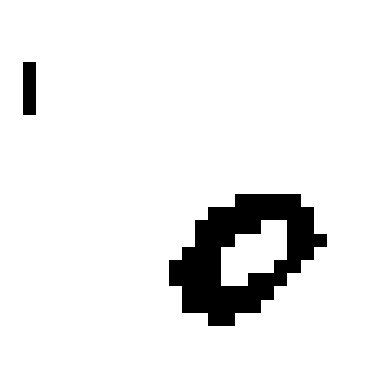

In [30]:
sample = curr_data_num_trVal_img[186].copy()
plot_digit(detect_del_boundary_v2(sample))

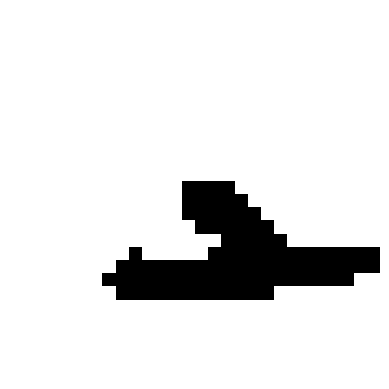

In [31]:
sample = curr_data_num_trVal_img[280].copy()
plot_digit(detect_del_boundary_v2(sample))